### Big Mart Sales Prediction  (CRISP DM)


“The goal of forecasting is not to predict the future but to tell you what you need to know to take meaningful action in the present.” - Paul Saffo

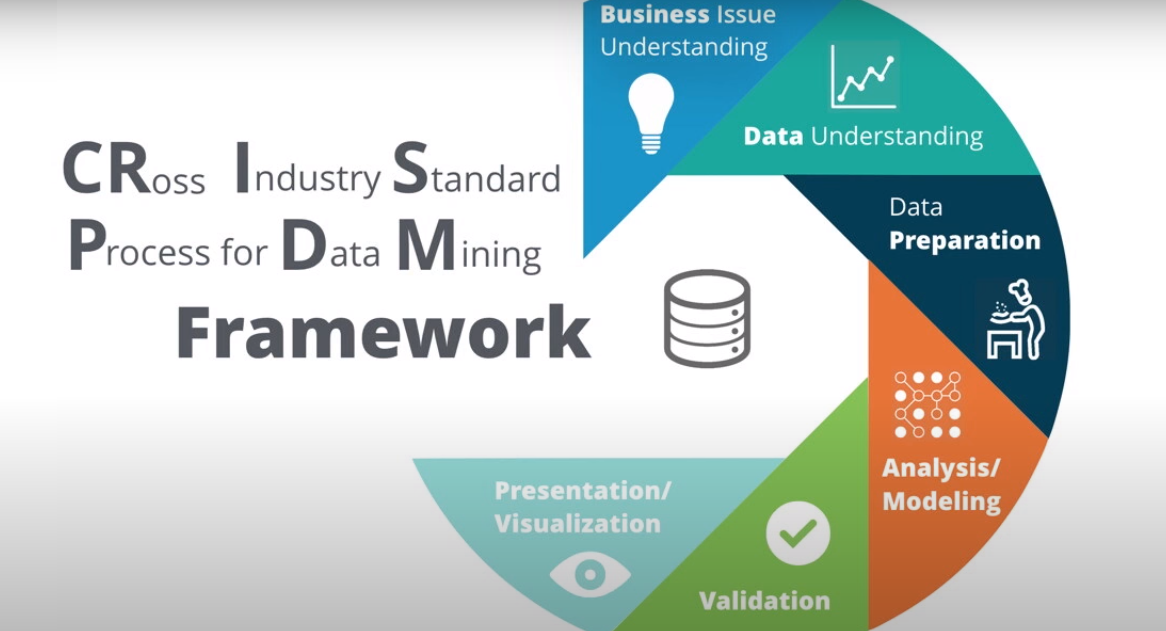

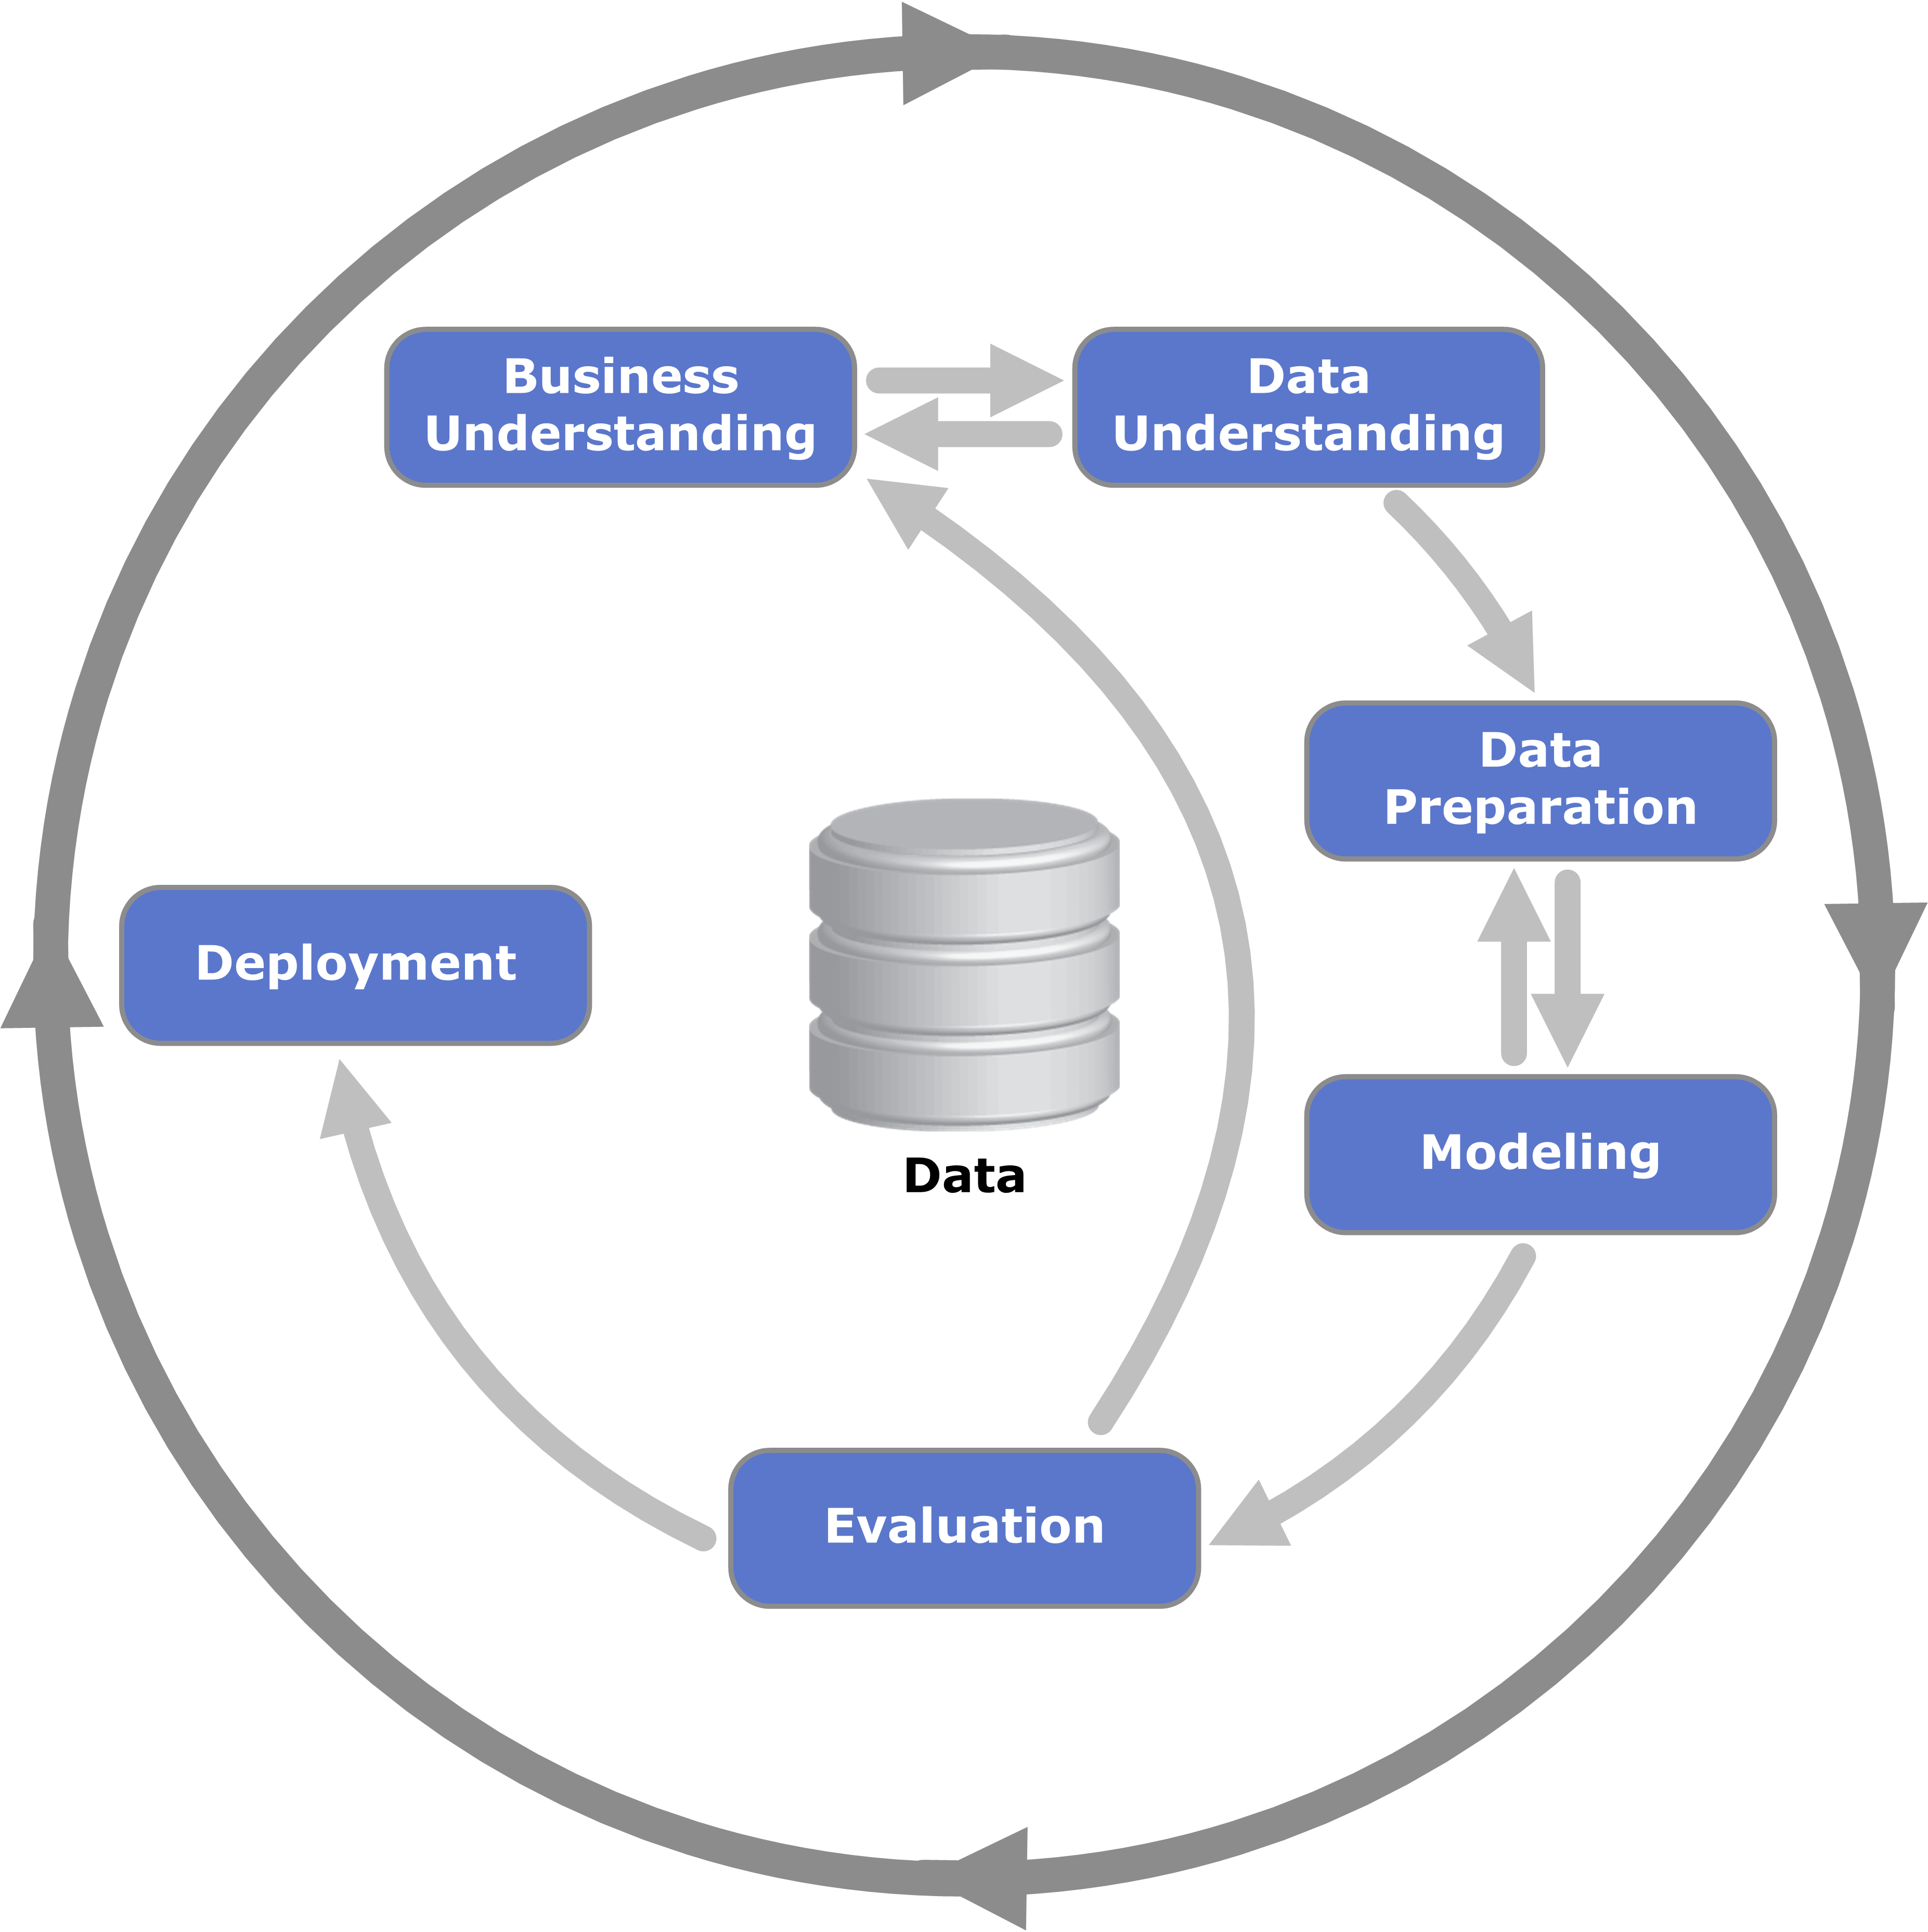

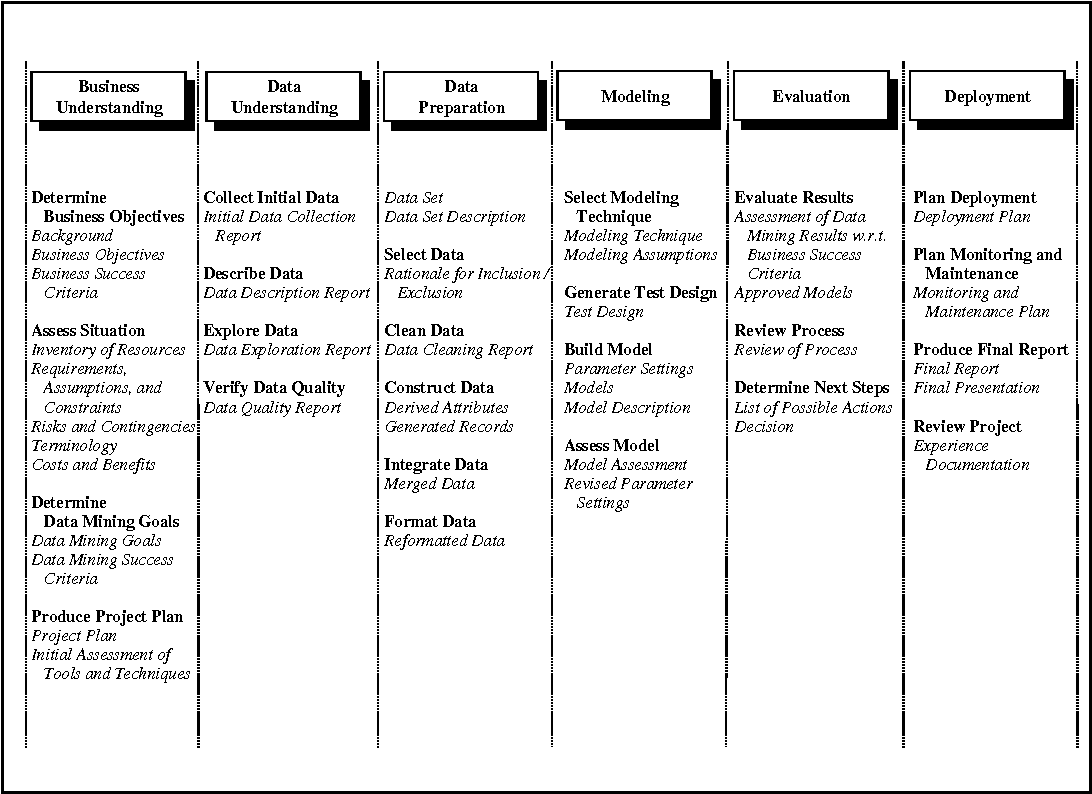

### 1. Business Understanding: 

A sales forecast helps every business make better business decisions. It helps in overall business planning, budgeting, and risk management. Sales forecasting allows companies to efficiently allocate resources for future growth. According to research by the Aberdeen Group, businesses that perform accurate sales forecasting are 7.3% more efficient in hitting their quota and accelerating their year-over-year revenue growth by 10%.
(https://cdn2.hubspot.net/hub/76666/file-2123964942-pdf/SalesForecasting_infographic_v6.pdf?t=1418163069861&__hstc=20629287.6c52c2a229a35643a996cba615cce0d0.1446758543736.1522580561138.1525514727881.60&__hssc=20629287.1.1525514727881&__hsfp=908707084)

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#### Hypothesis Generation : 
Hypothesis Generation should be done before seeing the data or else we will end up with biased hypotheses. Following are some of the hypotheses based on the problem statement.

a) Product Level:
-- Sales are higher for higher price products.  
-- Sales are higher for high visibility products.  
-- Higher sales for essential items.  

b) Store Level:
-- Older outlets have higher sales.  
-- Store size affects the sales.  
-- Location of the store affects the sales (ex: Tier 1)

### 2. Data Understanding: Attribute Information

* Item_Identifier:	Unique product ID
* Item_Weight:	Weight of product
* Item_Fat_Content:	Whether the product is low fat or not
* Item_Visibility:	The % of total display area of all products in a store allocated to the particular product
* Item_Type:	The category to which the product belongs
* Item_MRP:	Maximum Retail Price (list price) of the product
* Outlet_Identifier:	Unique store ID
* Outlet_Establishment_Year:	The year in which store was established
* Outlet_Size:	The size of the store in terms of ground area covered
* Outlet_Location_Type:	The type of city in which the store is located
* Outlet_Type:	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales:	Sales of the product in the particular store. This is the outcome variable to be predicted.

## Preliminary Data Analysis

In [123]:
#Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.chdir(r'C:\Users\tejas\Downloads')
data = pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
data.shape

(8523, 12)

In [125]:
data.Item_Identifier.nunique()

1559

In [126]:
#unique outlet 
data.Outlet_Identifier.nunique()

10

In [127]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [128]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [129]:
## EDA:

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

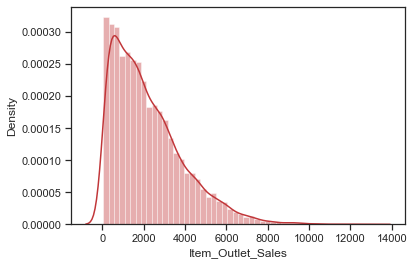

In [130]:
sns.distplot(data['Item_Outlet_Sales'])

Data is skewed towards right means positively skewed. Right-skewed distributions are also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line.  
Show peakness.  
Deviate from normal distribution.

In [131]:
# Let's check for skewness and kurtosis
print("Skewness ", data['Item_Outlet_Sales'].skew())
print("Kurtosis ", data['Item_Outlet_Sales'].kurt())

Skewness  1.1775306028542796
Kurtosis  1.6158766814287264


Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails

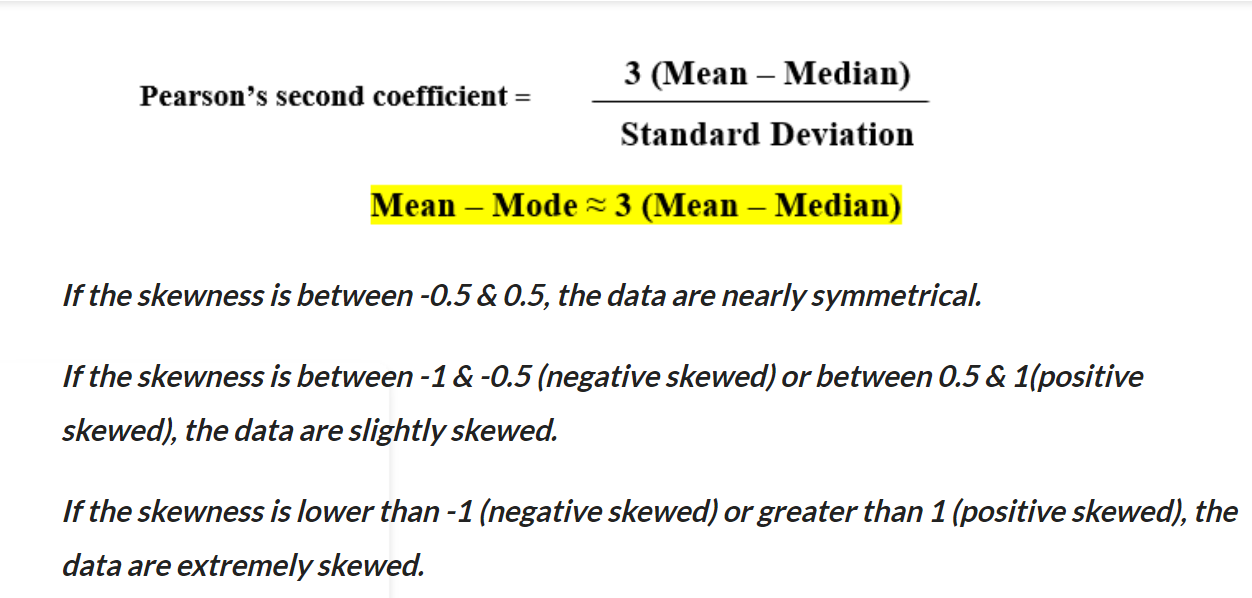

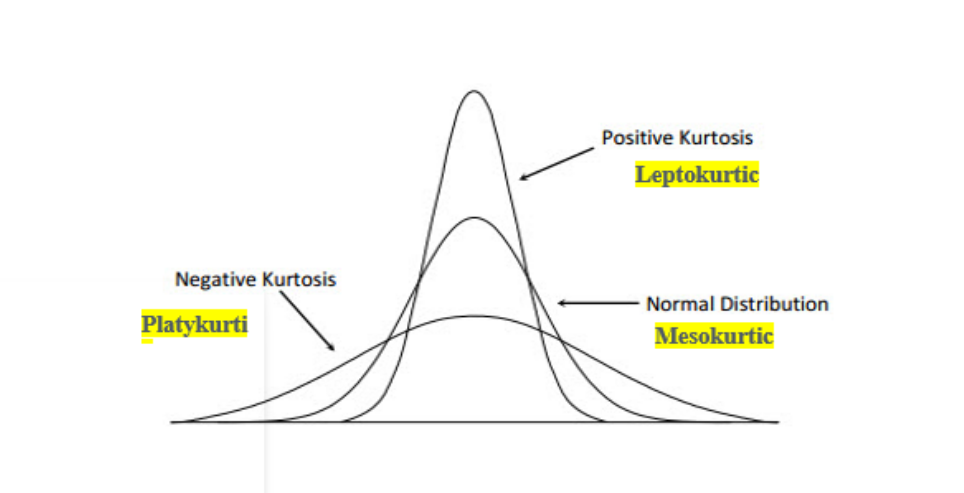

The excess kurtosis is used in statistics and probability theory to compare the kurtosis coefficient with that normal distribution. Excess kurtosis can be positive (Leptokurtic distribution), negative (Platykurtic distribution), or near to zero (Mesokurtic distribution). Since normal distributions have a kurtosis of 3, excess kurtosis is calculating by subtracting kurtosis by 3.

               Excess kurtosis  =  Kurt – 3

Types of excess kurtosis:

Leptokurtic or heavy-tailed distribution (kurtosis more than normal distribution).
Mesokurtic (kurtosis same as the normal distribution).
Platykurtic or short-tailed distribution (kurtosis less than normal distribution).

When data skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance especially regression-based models. Some statistical models are hardy to outliers like Tree-based models, but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Normal distribution.

### Independent Variables (numeric variables):  
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of individual variables.

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

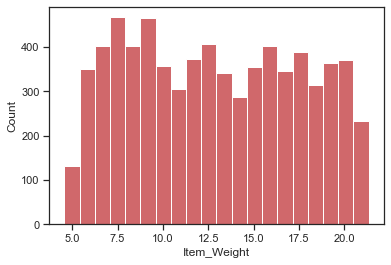

In [132]:
#Item_Weight 
sns.histplot(data.Item_Weight )

<AxesSubplot:xlabel='Item_Weight'>

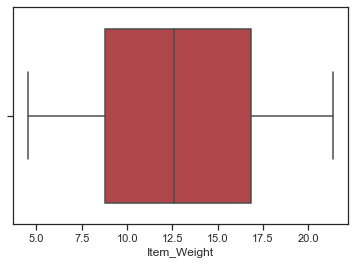

In [133]:
sns.boxplot(data.Item_Weight )

In [134]:
#There is no clear pattern in Item_Weight, but there are a lot of missing values.

In [135]:
#MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

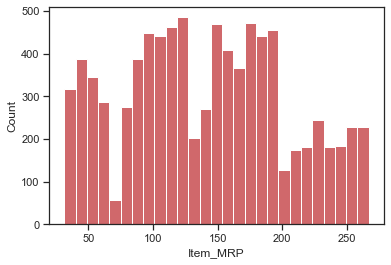

In [136]:
sns.histplot(data.Item_MRP)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

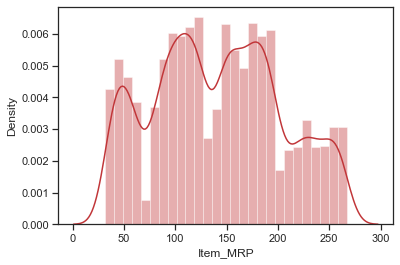

In [137]:
sns.distplot(data.Item_MRP)

<AxesSubplot:xlabel='Item_MRP'>

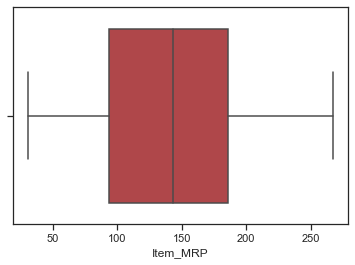

In [138]:
sns.boxplot(data.Item_MRP )

In [139]:
#There is no clear pattern in Item_MRP. But there appear to be 4 categories.

In [140]:
#Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

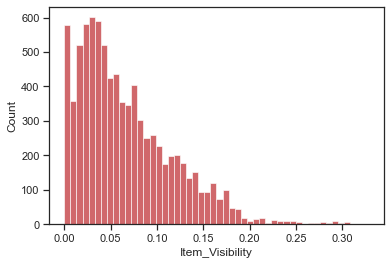

In [141]:
sns.histplot(data.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility'>

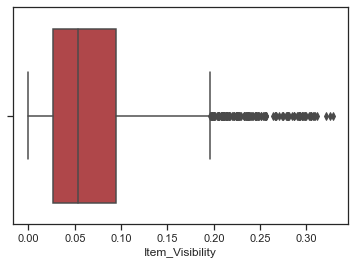

In [142]:
sns.boxplot(data.Item_Visibility)

In [143]:
#Item_Visibility is right-skewed and should be transformed to curb its skewness.

### Independent Variables (categorical variables)
Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

In [144]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

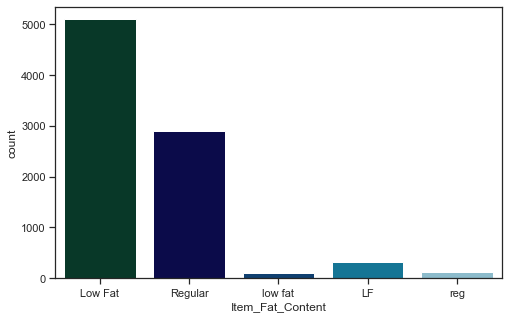

In [145]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=data,palette='ocean')

In [146]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

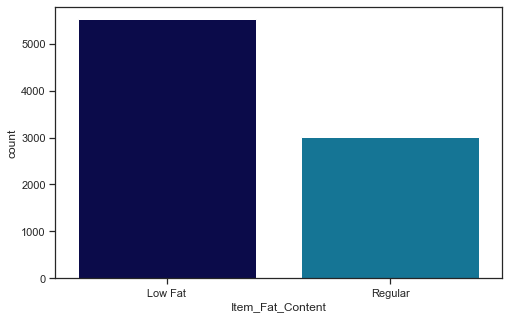

In [147]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=data,palette='ocean')

In [148]:
### Observations:
## The Items bought are more of Low Fat.

In [149]:
#Item_Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

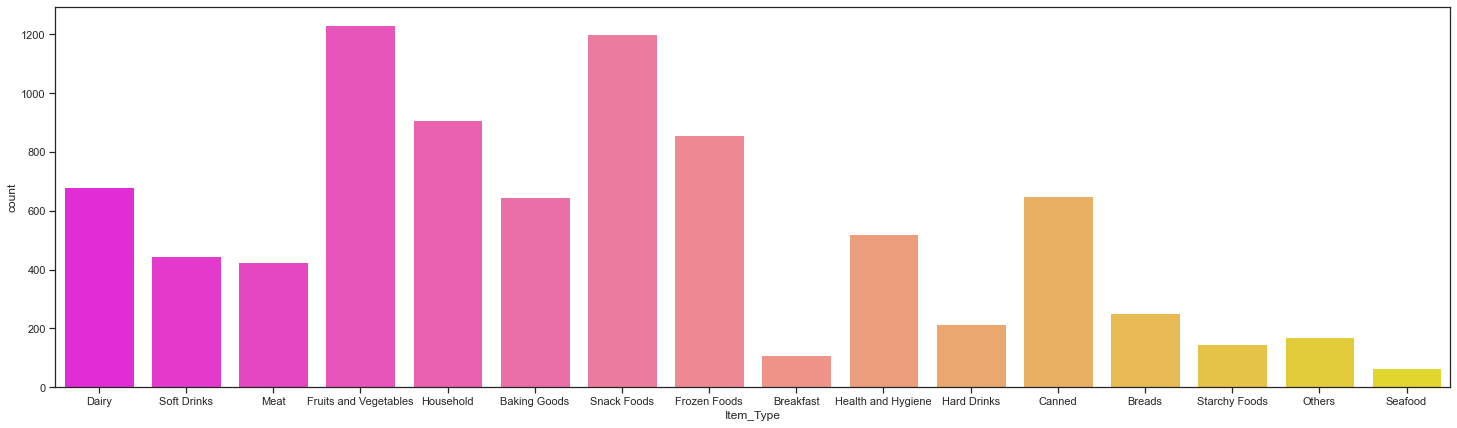

In [150]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=data,palette='spring')

### Observations:
Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

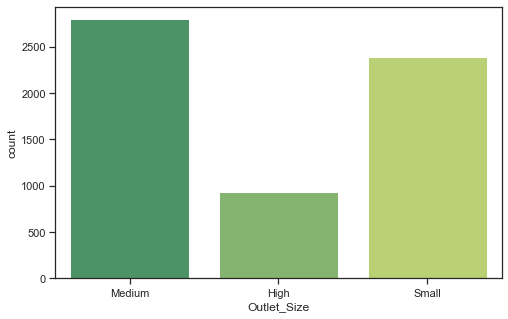

In [151]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=data,palette='summer')

### Observations:
The Outlets are more of Medium Size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

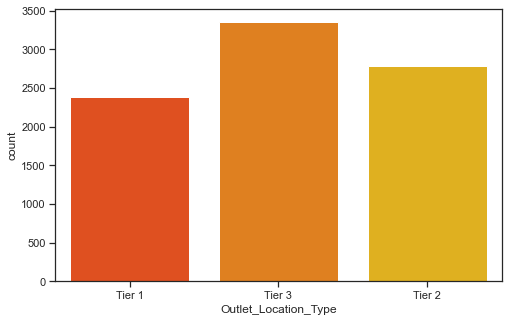

In [152]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=data,palette='autumn')

### Observations:
The Outlets are maximum in number in Tier 3 Cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

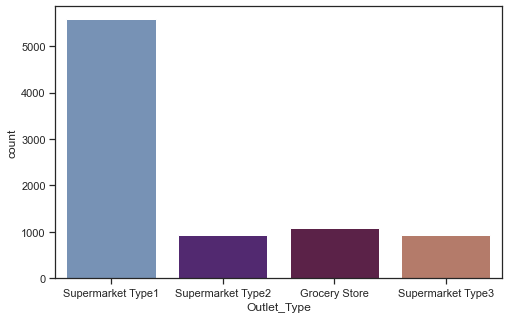

In [153]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=data,palette='twilight')

### Observations:¶
The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

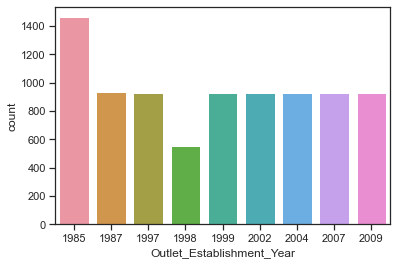

In [154]:
sns.countplot(x='Outlet_Establishment_Year',data=data)

## Observations:
The Outlets are more of established and running from 28 years.

In [35]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [155]:
data["Years_Established"]= data["Outlet_Establishment_Year"].apply(lambda x:2013-x)

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

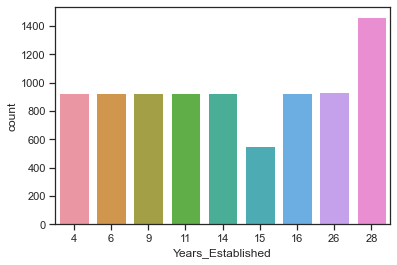

In [156]:
sns.countplot(x='Years_Established',data=data)

In [ ]:
#Outlets more than 26 years are higher in number

### Bivariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

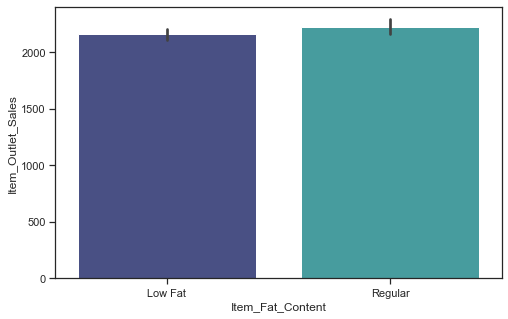

In [159]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=data,palette='mako')

In [160]:
#Observations:
#The Item Outles sales are same for both Low Fat and Regular Item types

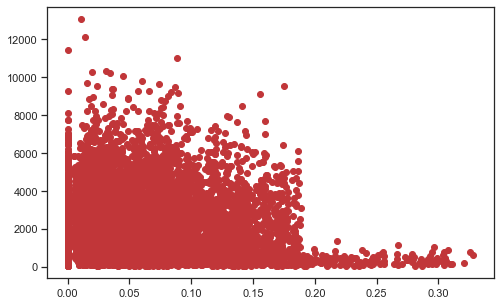

In [161]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=data)

Observations:
Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

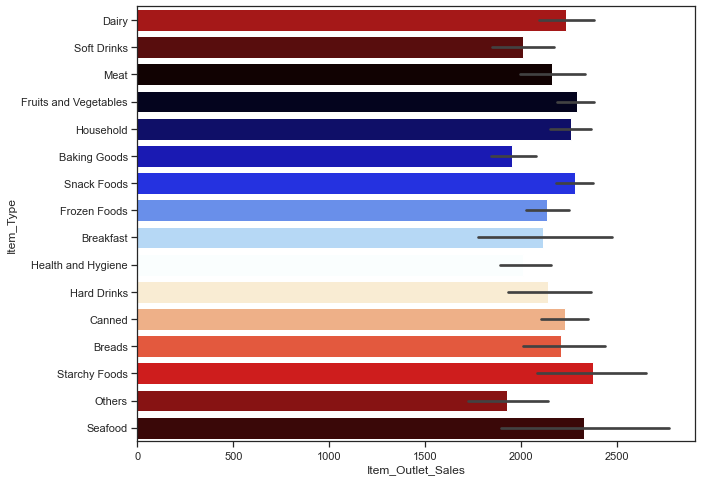

In [162]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=data,palette='flag')

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

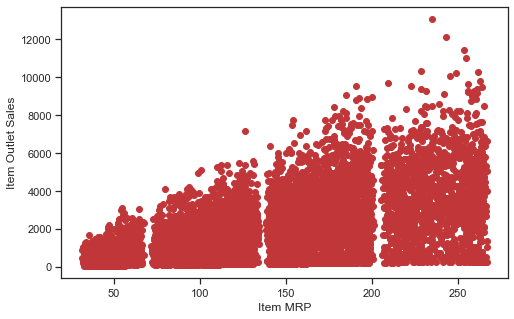

In [163]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Observations:
Items MRP ranging from 200-250 dollars is having high Sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

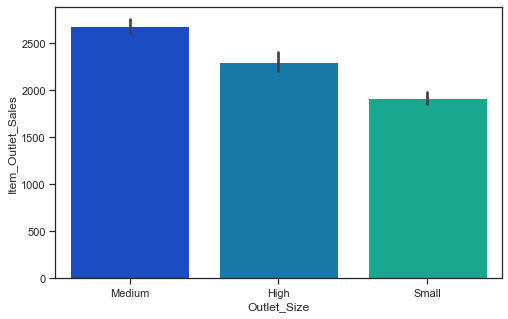

In [164]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='winter')

The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

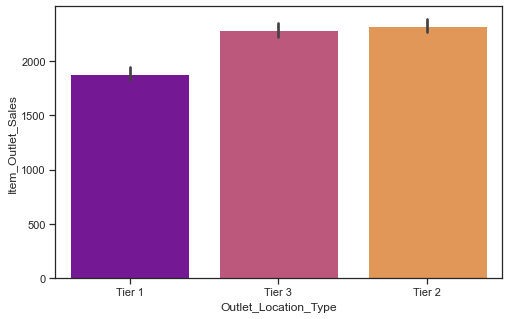

In [165]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='plasma')

Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

### Multivariate Analysis

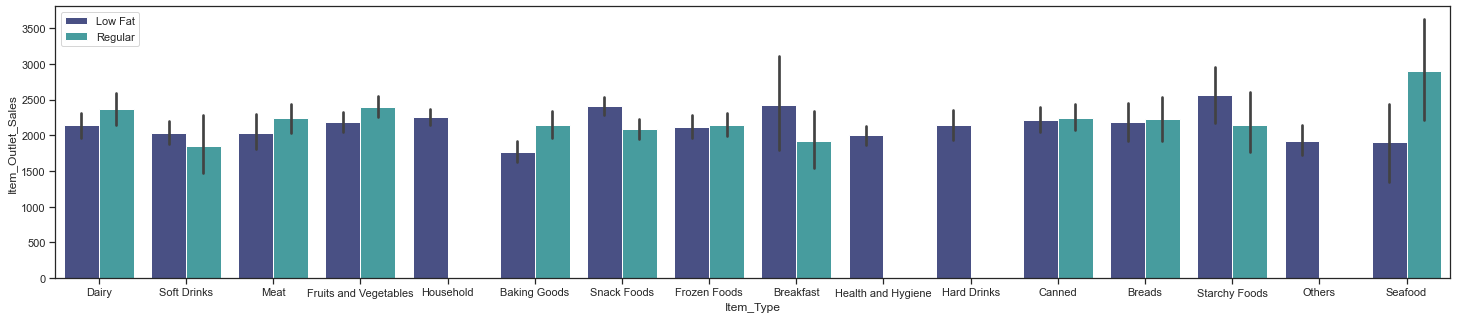

In [166]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=data,palette='mako')
plt.legend()

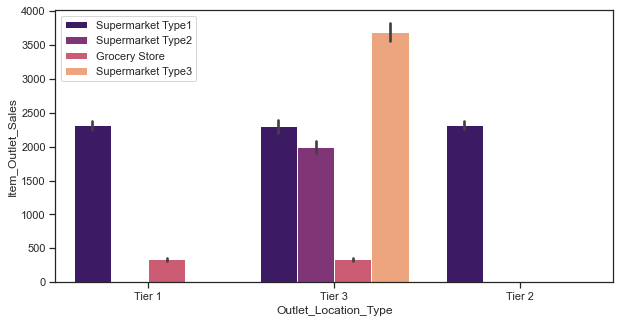

In [167]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

In [168]:
Observations:
The Tier-3 location type has all types of Outlet type and has high sales margin.

SyntaxError: invalid syntax (Temp/ipykernel_8240/713366304.py, line 1)

<Figure size 576x432 with 0 Axes>

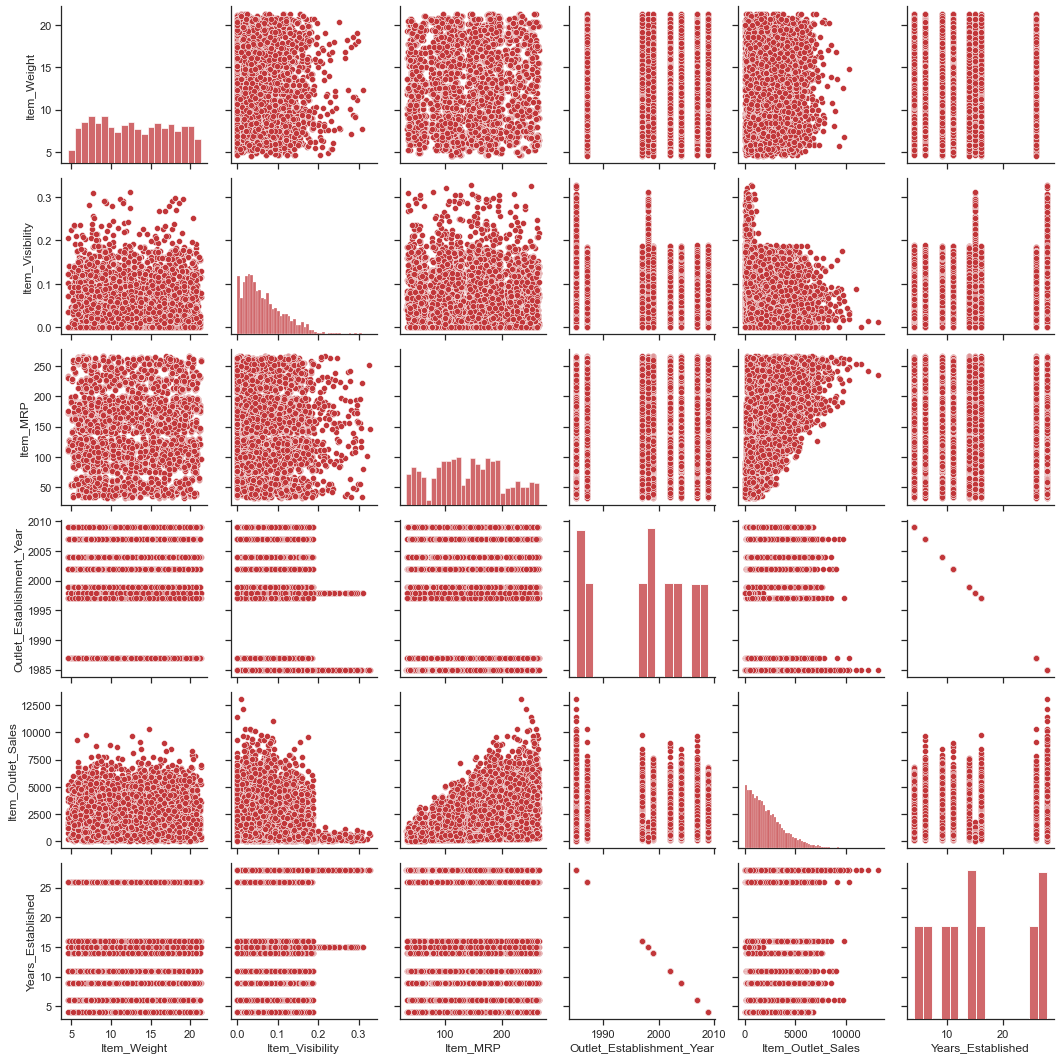

In [169]:
plt.figure(figsize=(8,6))
sns.pairplot(data)

#### There is no significant correlation observed except Item_MRP vs Item_Outlet_Sales, the MRP of items increases the sales is also increasing.

<AxesSubplot:>

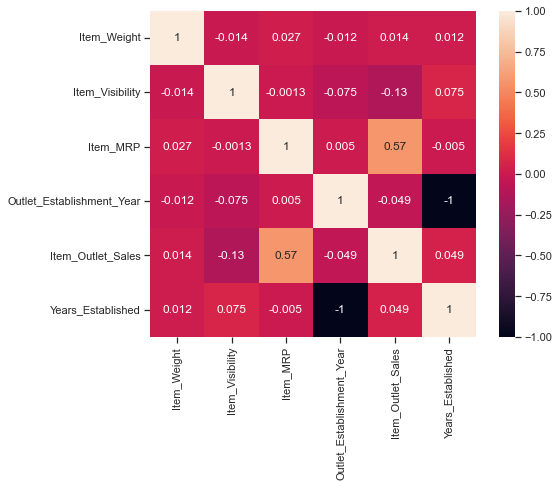

In [171]:
corrmat = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, square=True)

### Data Cleaning and Missing Value Imputation

In [170]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Years_Established               0
dtype: int64

We have missing values in Item_Weight and Outlet_Size. We’ll now impute Item_Weight with mean weight based on the Item_Identifier variabe.



<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

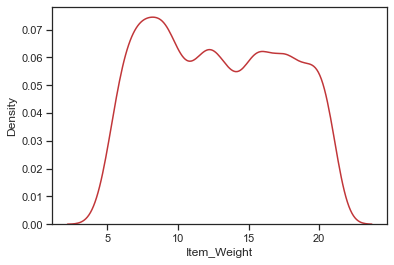

In [172]:
sns.distplot(data['Item_Weight'],hist=False)

In [173]:
data['Item_Weight'].skew()

0.0824262091221237

#### As Item_Weight is a numerical variable and the distribution is not that much skewed we will replace the null values by mean 

In [174]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

#### As Outlet_Size is a categorical variable we will replace the null values by mode

In [175]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [176]:
data['Outlet_Size'] = data.Outlet_Size.fillna("Medium")

In [177]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Years_Established            0
dtype: int64

#### Modifying Item_Visibility ,We noticed that the minimum value here is 0, which makes no practical sense.so we will replace the 0 value with mean of the Item_Visibility

In [178]:
mean_Item_Visibility = data['Item_Visibility'].mean()

In [179]:
data['Item_Visibility']=data['Item_Visibility'].mask(data['Item_Visibility'] == 0,mean_Item_Visibility)

In [180]:
data['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### Feature Engineering

Most of the times the given features in a dataset are not enough to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

We can have a look at the Item_Type variable and classify the categories into perishable and non_perishable as per our understanding and make it into a new feature.

In [181]:
data['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [182]:
data.groupby('Item_Type')['Item_Identifier'].unique()

Item_Type
Baking Goods             [FDP36, FDW12, FDC37, FDL12, FDN48, FDR12, FDA...
Breads                   [FDO23, FDV11, FDW11, FDR47, FDZ35, FDV59, FDP...
Breakfast                [FDP49, FDQ49, FDN13, FDN01, FDM25, FDO01, FDM...
Canned                   [FDC14, FDC02, FDL50, FDV49, FDR13, FDI26, FDG...
Dairy                    [FDA15, FDA03, FDU02, FDE51, FDV38, FDM39, FDS...
Frozen Foods             [FDH17, FDU28, FDR28, FDM40, FDY40, FDC29, FDL...
Fruits and Vegetables    [FDX07, FDY07, FDX32, FDF32, FDV20, FDA43, FDM...
Hard Drinks              [DRI11, DRJ59, DRK35, DRG23, DRM47, DRP47, DRQ...
Health and Hygiene       [NCB42, NCS17, NCX29, NCP05, NCL17, NCI17, NCR...
Household                [NCD19, NCB30, NCD06, NCP18, NCX54, NCZ18, NCL...
Meat                     [FDN15, FDK43, FDV27, FDH19, FDN27, FDW39, FDW...
Others                   [NCN07, NCO55, NCM43, NCN55, NCO07, NCM31, NCK...
Seafood                  [FDG33, FDH21, FDG21, FDJ57, FDJ45, FDI57, FDK...
Snack Foods    

In [183]:
# so for one perticuler item there are multiple identifier,we have to try to 
#categorise the item codes 
# if we look at the item identifier 'FD' stands for Food 'DR' stands for Drinks 
# and 'NC' stands for Goods so we will combine Item_Identifier into three 
#category 

In [184]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [185]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [186]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [187]:
data['Item_Category'] = data['Item_Identifier'].replace({'FD':'Food','NC':'Goods', 'DR':'Drinks'})

In [188]:
data['Item_Category'].value_counts()

Food      6125
Goods     1599
Drinks     799
Name: Item_Category, dtype: int64

In [192]:
data.drop('Item_Identifier', axis=1, inplace= True)

In [ ]:
#data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [189]:
data.drop('Outlet_Establishment_Year', axis=1, inplace= True)

In [194]:
data.shape

(8523, 12)

In [193]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15,Food
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Goods


In [195]:
df_test = data['Item_Outlet_Sales']

In [196]:
df_train = data.drop('Item_Outlet_Sales',axis=1)

In [197]:
df_train.shape, df_test.shape

((8523, 11), (8523,))

#### Encoding Categorical Variables
In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

In One hot encoding, each category of a categorical variable is converted into a new binary column (0/1).

In [198]:
df_train_cat=df_train.select_dtypes(include=['object'])

In [199]:
df_train_cat.shape

(8523, 7)

In [200]:
df_train_cat_dummy=pd.get_dummies(df_train_cat,drop_first=True)
df_train_cat_dummy.shape

(8523, 34)

In [201]:
df_train_num=df_train.select_dtypes(exclude=['object'])

In [202]:
df_train_num.shape

(8523, 4)

### Scaling numeric predictors
Let’s scale and center the numeric variables to make them have a mean of zero, standard deviation of one and scale of 0 to 1. Scaling and centering is required for linear regression models.

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_num_scaled=pd.DataFrame(scaler.fit_transform(df_train_num),columns=df_train_num.columns)

In [204]:
df_train_num_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Established
0,-0.841872,-1.111358,1.747454,-0.139541
1,-1.641706,-1.045067,-1.489023,-1.334103
2,1.098554,-1.096733,0.010040,-0.139541
3,1.500838,-0.083740,0.660050,-0.020085
4,-0.929428,-0.083740,-1.399220,1.293934


In [205]:
df_train_final= pd.concat([df_train_num_scaled, df_train_cat_dummy], axis=1,sort=False)
df_train_final

,Item_Weight,Item_Visibility,Item_MRP,Years_Established,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Goods
0,-0.841872,-1.111358,1.747454,-0.139541,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
1,-1.641706,-1.045067,-1.489023,-1.334103,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,1.098554,-1.096733,0.010040,-0.139541,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,1.500838,-0.083740,0.660050,-0.020085,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,-0.929428,-0.083740,-1.399220,1.293934,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,1.293934,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,-1.059578,-0.476643,-0.527301,-0.497909,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
8520,-0.534243,-0.718672,-0.897208,-0.736822,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,-1.336444,1.538968,-0.607977,-1.334103,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


### Modeling
Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will build the models using…

-- Linear Regression  
-- Lasso Regression  
-- Ridge Regression  
-- RandomForest  

In [206]:
#import stats models api as sm
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

X = df_train_final
X = sm.add_constant(X)
y = df_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [207]:
model = sm.OLS(y_train,X_train).fit()

In [208]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                     OLS                    Adj. R-squared:          0.562      
Dependent Variable:        Item_Outlet_Sales      AIC:                     115152.3682
Date:                      2022-07-04 00:06       BIC:                     115357.1878
No. Observations:          6818                   Log-Likelihood:          -57546.    
Df Model:                  29                     F-statistic:             302.3      
Df Residuals:              6788                   Prob (F-statistic):      0.00       
R-squared:                 0.564                  Scale:                   1.2607e+06 
--------------------------------------------------------------------------------------
                                  Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------------------
const                            550.8377  68.6471   8.0242 0.0000  416.2678  685.4075
Item_Weight                       -0.4879  13.7365  -0.0355 0.9717  -27.4157   26.4399
Item_Visibility                  -13.1947  14.2964  -0.9229 0.3561  -41.2201   14.8307
Item_MRP                         965.9014  13.7299  70.3504 0.0000  938.9866  992.8163
Years_Established                246.2317  16.7461  14.7038 0.0000  213.4040  279.0594
Item_Fat_Content_Regular           9.8037  31.7959   0.3083 0.7578  -52.5262   72.1336
Item_Type_Breads                 -69.0202  94.0176  -0.7341 0.4629 -253.3241  115.2837
Item_Type_Breakfast               33.3800 133.9453   0.2492 0.8032 -229.1948  295.9547
Item_Type_Canned                  17.2800  70.3823   0.2455 0.8061 -120.6913  155.2513
Item_Type_Dairy                 -105.6976  74.3946  -1.4208 0.1554 -251.5344   40.1392
Item_Type_Frozen Foods           -15.6172  66.0895  -0.2363 0.8132 -145.1733  113.9390
Item_Type_Fruits and Vegetables    8.9913  61.9631   0.1451 0.8846 -112.4758  130.4583
Item_Type_Hard Drinks           -225.3147 155.6923  -1.4472 0.1479 -530.5205   79.8911
Item_Type_Health and Hygiene     -63.5208  57.9965  -1.0953 0.2734 -177.2121   50.1706
Item_Type_Household              -62.7637  52.6265  -1.1926 0.2331 -165.9282   40.4007
Item_Type_Meat                    -0.6104  78.9939  -0.0077 0.9938 -155.4633  154.2425
Item_Type_Others                 -38.2935  80.6986  -0.4745 0.6351 -196.4880  119.9011
Item_Type_Seafood                314.7701 163.7418   1.9224 0.0546   -6.2152  635.7554
Item_Type_Snack Foods            -34.5906  62.2752  -0.5554 0.5786 -156.6695   87.4883
Item_Type_Soft Drinks           -194.9907 142.1403  -1.3718 0.1702 -473.6302   83.6488
Item_Type_Starchy Foods          -36.9576 113.9096  -0.3244 0.7456 -260.2561  186.3408
Outlet_Identifier_OUT013         295.3217  20.2106  14.6122 0.0000  255.7026  334.9407
Outlet_Identifier_OUT017         221.7844  33.7811   6.5653 0.0000  155.5628  288.0060
Outlet_Identifier_OUT018         972.7875  36.9736  26.3103 0.0000  900.3077 1045.2674
Outlet_Identifier_OUT019        -453.6970  33.1169 -13.6999 0.0000 -518.6165 -388.7775
Outlet_Identifier_OUT027        1454.4096  30.0528  48.3952 0.0000 1395.4967 1513.3225
Outlet_Identifier_OUT035         242.3249  27.2138   8.9045 0.0000  188.9773  295.6724
Outlet_Identifier_OUT045         -40.8873  31.4705  -1.2992 0.1939 -102.5792   20.8047
Outlet_Identifier_OUT046         309.9068  31.0253   9.9888 0.0000  249.0875  370.7262
Outlet_Identifier_OUT049         426.7002  29.7965  14.3205 0.0000  368.2897  485.1108
Outlet_Size_Medium               156.9813  40.2320   3.9019 0.0001   78.1141  235.8486
Outlet_Size_Small                 98.5347  35.6018   2.7677 0.0057   28.7440  168.3254
Outlet_Location_Type_Tier 2      423.2220  21.7180  19.4871 0.0000  380.6478  465.7961
Outlet_Location_Type_Tier 3     -155.2944  41.1256  -3.7761 0.00

In [83]:
## Findings

1.p value for F satistic is < 0.05 (we will consider 0.5 as significance level for this project) so we can say that our model is significant (at least for one independent variable the regression coef. is not equal zero,rejecting the null hypothesis,The null hypothesis under this is “all the regression coefficients are equal to zero”.)

2.R squared value indicates that 56.4 percentage of the variance in the dependent variable is explained by our model , Adjusted R square value is lesser than R square that is indicating that our model has insignificant attributes

3.we will check multicollinearity , because if multicollinearity exists in among independent attributes then we can not interpret regression coefficients and t values

<AxesSubplot:>

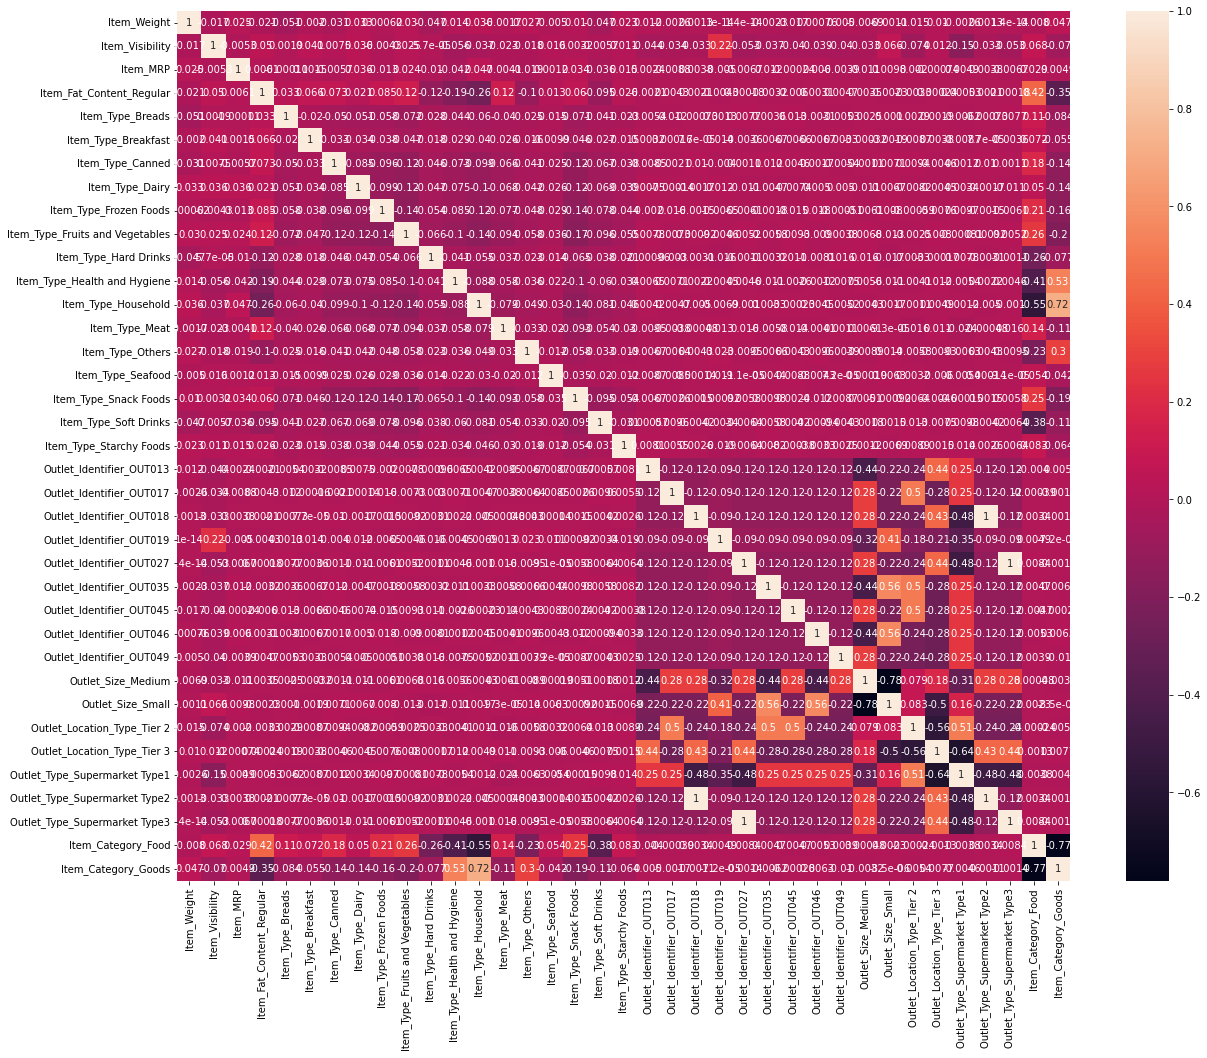

In [84]:
plt.figure(figsize=(20,16))
sns.heatmap(df_train_final.corr(), annot=True)

'Outlet_Type_Supermarket Type2', 'Outlet_Identifier_OUT018' and 'Outlet_Type_Supermarket Type3' and 'Outlet_Identifier_OUT027' are highly correlated we will drop 'Outlet_Identifier_OUT018' and 'Outlet_Identifier_OUT027'

In [209]:

df_train_final1=df_train_final.drop(['Outlet_Identifier_OUT027','Outlet_Identifier_OUT018'],axis=1)

In [212]:
import statsmodels.api as sm
X1= sm.add_constant(df_train_final1)
ols=sm.OLS(df_test,X1)
result=ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                     OLS                    Adj. R-squared:          0.562      
Dependent Variable:        Item_Outlet_Sales      AIC:                     144036.0037
Date:                      2022-07-04 00:07       BIC:                     144247.5195
No. Observations:          8523                   Log-Likelihood:          -71988.    
Df Model:                  29                     F-statistic:             378.4      
Df Residuals:              8493                   Prob (F-statistic):      0.00       
R-squared:                 0.564                  Scale:                   1.2748e+06 
--------------------------------------------------------------------------------------
                                  Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------------------
const                            421.1496  62.3278   6.7570 0.0000  298.9720  543.3272
Item_Weight                       -2.2116  12.3195  -0.1795 0.8575  -26.3609   21.9377
Item_Visibility                  -11.3995  12.9066  -0.8832 0.3771  -36.6996   13.9007
Item_MRP                         969.5917  12.3386  78.5817 0.0000  945.4049  993.7785
Years_Established                365.0324  14.0367  26.0056 0.0000  337.5171  392.5478
Item_Fat_Content_Regular          42.0157  28.4650   1.4760 0.1400  -13.7827   97.8140
Item_Type_Breads                   5.2951  84.0519   0.0630 0.9498 -159.4671  170.0572
Item_Type_Breakfast                5.5951 116.6014   0.0480 0.9617 -222.9720  234.1621
Item_Type_Canned                  25.2086  62.7725   0.4016 0.6880  -97.8408  148.2581
Item_Type_Dairy                  -50.6712  66.0447  -0.7672 0.4430 -180.1348   78.7924
Item_Type_Frozen Foods           -27.9928  58.8736  -0.4755 0.6345 -143.3994   87.4139
Item_Type_Fruits and Vegetables   29.7663  54.9622   0.5416 0.5881  -77.9729  137.5056
Item_Type_Hard Drinks            -45.9740 139.6520  -0.3292 0.7420 -319.7260  227.7780
Item_Type_Health and Hygiene      -3.8025  52.7278  -0.0721 0.9425 -107.1619   99.5569
Item_Type_Household              -33.0740  47.7043  -0.6933 0.4881 -126.5861   60.4381
Item_Type_Meat                    -0.4530  70.6709  -0.0064 0.9949 -138.9851  138.0792
Item_Type_Others                 -15.0544  73.0026  -0.2062 0.8366 -158.1573  128.0485
Item_Type_Seafood                184.4669 148.0166   1.2463 0.2127 -105.6817  474.6154
Item_Type_Snack Foods            -11.4697  55.2542  -0.2076 0.8356 -119.7813   96.8419
Item_Type_Soft Drinks            -73.5376 128.0414  -0.5743 0.5658 -324.5298  177.4547
Item_Type_Starchy Foods           21.8654 103.0469   0.2122 0.8320 -180.1315  223.8624
Outlet_Identifier_OUT013         196.5365  20.1478   9.7547 0.0000  157.0418  236.0311
Outlet_Identifier_OUT017         279.6354  30.2624   9.2403 0.0000  220.3136  338.9571
Outlet_Identifier_OUT019        -621.7160  33.3987 -18.6150 0.0000 -687.1855 -556.2464
Outlet_Identifier_OUT035         317.1172  25.1462  12.6110 0.0000  267.8246  366.4099
Outlet_Identifier_OUT045        -112.5733  28.7351  -3.9176 0.0001 -168.9010  -56.2455
Outlet_Identifier_OUT046         352.5093  28.0786  12.5544 0.0000  297.4685  407.5502
Outlet_Identifier_OUT049         407.5555  26.6758  15.2781 0.0000  355.2643  459.8466
Outlet_Size_Medium               176.7025  35.8123   4.9341 0.0000  106.5017  246.9033
Outlet_Size_Small                 47.9106  32.2053   1.4877 0.1369  -15.2197  111.0409
Outlet_Location_Type_Tier 2      484.1793  19.2424  25.1621 0.0000  446.4595  521.8991
Outlet_Location_Type_Tier 3     -201.3786  37.1523  -5.4203 0.0000 -274.2062 -128.5510
Outlet_Type_Supermarket Type1   1440.7806  31.5957  45.6005 0.0000 1378.8454 1502.7158
Outlet_Type_Supermarket Type2   2111.3821  64.7432  32.6117 0.00

1.p value for F satistic is < 0.05 (we will consider 0.5 as significance level for this project) so we can say that our model is significant (at least for one independent variable the regression coef. is not equal zero,rejecting the null hypothesis,The null hypothesis under this is “all the regression coefficients are equal to zero”.)

2.Now we will check p values for each attributes if the p values is <0.05 we will say that the attricute is contributing to the model (reject the null hypothesis(coef=0)) if > 0.05 then the attribute is insignificant (accept the ull hypothesis(coef=0))

3.looking the p values we can say 'Item_Weight', 'Item_Visibility', 'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods','Item_Category_Food', 'Item_Category_Goods', 'Outlet_Identifier_OUT045','Outlet_Size_Medium' have no contribution to the dependent variable ,

4.we can conclude that these attributes are not driving the sales

5.Prob(Omnibus): One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0.000, which implies that the OLS assumption is not satisfied , the errors are not normally distributed

6.Durbin-watson:  A value between 1 to 2 is preferred. Here, it is 2.004 (~2) implying that the regression results are reliable from the interpretation side of this metric.

7.Prob(Jarque-Bera): It is in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. A large value of JB test indicates that the errors are not normally distributed.

In [213]:
df_train_final2 = df_train_final1.drop(['Item_Weight', 'Item_Visibility',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods','Item_Category_Food',
       'Item_Category_Goods','Outlet_Identifier_OUT045','Outlet_Size_Medium'],axis=1)

In [214]:
import statsmodels.api as sm
X2= sm.add_constant(df_train_final2)
ols=sm.OLS(df_test,X2)
result=ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                   OLS                    Adj. R-squared:          0.563      
Dependent Variable:      Item_Outlet_Sales      AIC:                     144008.3633
Date:                    2022-07-04 00:12       BIC:                     144085.9191
No. Observations:        8523                   Log-Likelihood:          -71993.    
Df Model:                10                     F-statistic:             1098.      
Df Residuals:            8512                   Prob (F-statistic):      0.00       
R-squared:               0.563                  Scale:                   1.2735e+06 
------------------------------------------------------------------------------------
                                Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------------------------
const                          499.9583  24.5909  20.3311 0.0000  451.7543  548.1624
Item_MRP                       969.0084  12.2257  79.2602 0.0000  945.0431  992.9737
Years_Established              329.5878  14.2821  23.0769 0.0000  301.5913  357.5842
Outlet_Identifier_OUT013       113.5304  30.7775   3.6887 0.0002   53.1991  173.8618
Outlet_Identifier_OUT017       368.9418  51.1496   7.2130 0.0000  268.6761  469.2074
Outlet_Identifier_OUT019      -638.8120  27.6572 -23.0975 0.0000 -693.0269 -584.5971
Outlet_Identifier_OUT035       298.6594  34.5485   8.6446 0.0000  230.9359  366.3829
Outlet_Identifier_OUT046       332.8906  27.4031  12.1479 0.0000  279.1739  386.6073
Outlet_Identifier_OUT049       502.2642  31.0885  16.1559 0.0000  441.3232  563.2052
Outlet_Size_Small               -7.2620  22.9970  -0.3158 0.7522  -52.3417   37.8177
Outlet_Location_Type_Tier 2    454.2540  28.7052  15.8248 0.0000  397.9847  510.5232
Outlet_Location_Type_Tier 3   -150.6385  31.2581  -4.8192 0.0000 -211.9120  -89.3649
Outlet_Type_Supermarket Type1 1402.9393  25.3030  55.4455 0.0000 1353.3392 1452.5393
Outlet_Type_Supermarket Type2 2075.2102  66.9424  30.9999 0.0000 1943.9869 2206.4336
Outlet_Type_Supermarket Type3 2858.0445  48.0107  59.5293 0.0000 2763.9319 2952.1571
------------------------------------------------------------------------------------
Omnibus:                 965.229         Durbin-Watson:            2.003            
Prob(Omnibus):           0.000           Jarque-Bera (JB):         2307.927         
Skew:                    0.669           Prob(JB):                 0.000            
Kurtosis:                5.170           Condition No.:            35617373321984052
====================================================================================
* The condition number is large (4e+16). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Observations 
1.F-statistic has increased by a significant amount , p value <0.05 so model is significant 

2.R squared has decreases and Adjusted R squared has increases by small amount which proves that the dropped attributes were insignificant for the model.

3.the p value of all attributes are <0.05 so , all the selected attributes are significant to dependet variable 

4.Looking at the attributes we can conclude that the Sales depends mainly on location , type and size of Outlet along with the MRP . The type of supermarket and mrp is the key indicators

In [215]:
df_train_final2.columns

Index(['Item_MRP', 'Years_Established', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [216]:
df_train_final3= df_train_final2[['Outlet_Location_Type_Tier 2','Outlet_Location_Type_Tier 3','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3','Outlet_Size_Small','Item_MRP','Years_Established']]

In [217]:
#import stats models api as sm
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

X = df_train_final3
X = sm.add_constant(X)
y = df_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [218]:
model = sm.OLS(y_train,X_train).fit()

In [219]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:         0.562      
Dependent Variable:       Item_Outlet_Sales     AIC:                    115117.3081
Date:                     2022-07-04 00:13      BIC:                    115178.7540
No. Observations:         6818                  Log-Likelihood:         -57550.    
Df Model:                 8                     F-statistic:            1093.      
Df Residuals:             6809                  Prob (F-statistic):     0.00       
R-squared:                0.562                 Scale:                  1.2581e+06 
-----------------------------------------------------------------------------------
                                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------------------
const                          317.7744  53.7155  5.9159 0.0000  212.4753  423.0735
Outlet_Location_Type_Tier 2    -11.8307  47.8946 -0.2470 0.8049 -105.7191   82.0577
Outlet_Location_Type_Tier 3     22.1672  52.9918  0.4183 0.6757  -81.7133  126.0477
Outlet_Type_Supermarket Type1 1981.6422  46.7179 42.4172 0.0000 1890.0606 2073.2239
Outlet_Type_Supermarket Type2 1646.6016  92.2040 17.8583 0.0000 1465.8530 1827.3501
Outlet_Type_Supermarket Type3 3368.7880  63.4098 53.1273 0.0000 3244.4851 3493.0910
Outlet_Size_Small               37.4879  38.9355  0.9628 0.3357  -38.8378  113.8136
Item_MRP                       959.5558  13.5407 70.8644 0.0000  933.0118  986.0999
Years_Established              -16.3932  31.3876 -0.5223 0.6015  -77.9228   45.1363
-----------------------------------------------------------------------------------
Omnibus:                   802.594            Durbin-Watson:               1.951   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2038.943
Skew:                      0.673              Prob(JB):                    0.000   
Kurtosis:                  5.316              Condition No.:               11      
===================================================================================

"""

## Coefficient Plot

In [220]:
model.params

const                             317.774430
Outlet_Location_Type_Tier 2       -11.830702
Outlet_Location_Type_Tier 3        22.167223
Outlet_Type_Supermarket Type1    1981.642246
Outlet_Type_Supermarket Type2    1646.601555
Outlet_Type_Supermarket Type3    3368.788027
Outlet_Size_Small                  37.487920
Item_MRP                          959.555849
Years_Established                 -16.393208
dtype: float64

<BarContainer object of 9 artists>

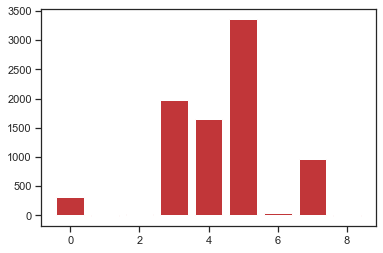

In [221]:
x = range(len(X_train.columns))
y = model.params
plt.bar(x,y)


#### We can see that the coefficient weights are skewed and unevenly distributed. So let us check for assumptions of Multiple Linear Regression.

In [240]:
y_pred = model.predict(X_test)
y_pred

5424    3381.117145
3339    1135.802882
3325    1711.186113
7040    1916.068028
1213    1600.579018
           ...     
3590    3084.634759
1971    3832.981110
916      940.454742
979     2674.654260
1893    3233.248863
Length: 1705, dtype: float64

In [241]:
y_pred1 = model.predict(X_train)
y_pred1

5399    2040.167120
5991    1447.669349
3718    3051.690562
4138     875.505436
3913    3173.759908
           ...     
6890    2483.849313
3264    1993.949152
6230    1889.853496
4687    3963.312557
6688    4275.957966
Length: 6818, dtype: float64

### Assumption 1: Residual Distribution

In [242]:
#Making Residual table
res = pd.DataFrame({'Fitted' : y_test, 'Predicted' : y_pred, 'Residuals' : y_test- y_pred})
res.head()

,Fitted,Predicted,Residuals
5424,2484.7656,3381.117145,-896.351545
3339,1661.8368,1135.802882,526.033918
3325,998.7000,1711.186113,-712.486113
7040,1717.7640,1916.068028,-198.304028
1213,1796.3284,1600.579018,195.749382


<AxesSubplot:xlabel='Residuals', ylabel='Density'>

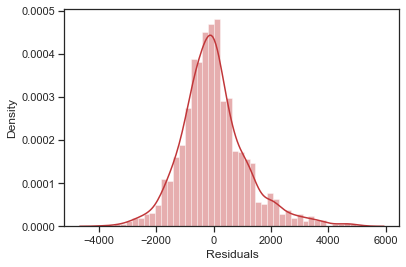

In [243]:
sns.distplot(res.Residuals)

### Hence the Residuals are normally distributed. This shows that it is symmetrical with no bias.

### Q-Q Plot (Checking normality)

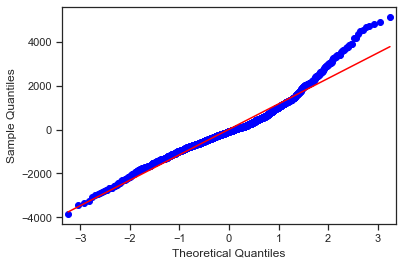

In [244]:
from statsmodels.graphics.gofplots import qqplot

qqplot(res.Residuals, line = 's')
plt.show()

### We can see that residuals are not normally distributed.

### Assumption 2: Multicollinearity

In [245]:
# importing the variance_inflation_factor() function
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,const,15.636343
1,Outlet_Location_Type_Tier 2,2.737940
2,Outlet_Location_Type_Tier 3,3.617859
3,Outlet_Type_Supermarket Type1,2.661258
4,Outlet_Type_Supermarket Type2,4.383470
5,Outlet_Type_Supermarket Type3,2.095752
6,Outlet_Size_Small,1.663586
7,Item_MRP,1.000336
8,Years_Established,5.294196


The model is now much more stable, so the variance of the coefficient estimate is stable and is not very sensitive to minor changes in the model.

### Assumption 3: Goldfeld-Quandt Test

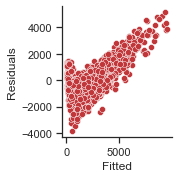

In [246]:
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=res, y_vars=['Residuals'], x_vars=['Fitted'])

### We can see a clear trend in residuals, with the fitted values. This indicates Heteroskedasticity.

### Assumption 4: Durbin- Watson Test- Checking autocorrelation of residuals

In [247]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [248]:
import numpy as np
y= res.Residuals
acf(res.Residuals,unbiased = True, nlags=5)

array([ 1.        ,  0.0276554 ,  0.02996292, -0.02637096,  0.01563162,
        0.00580791])

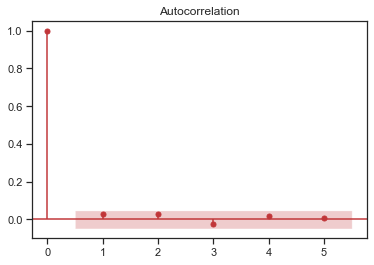

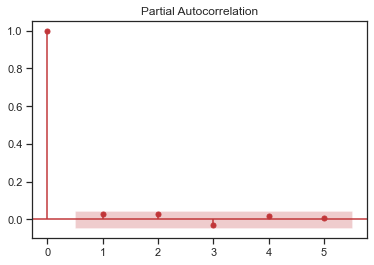

In [249]:
# plot acf, pacf
plot_acf(y, lags=5)
plot_pacf(y, lags=5, method='ols')
plt.show()

### From the ACF Plot, the residuals are not autocorrelated. This also means the cases are independent of each other.

### Performance Metrics

### Evaluation Metrics
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [250]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [257]:
e1 = metrics.mean_absolute_error(y_test,y_pred)
e2 = np.mean(np.abs(y_test- y_pred)/y_test)*100
e3 = metrics.mean_squared_error(y_test, y_pred)
e4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
e5 = r2_score(y_test, y_pred)



In [258]:
errors=['MAE','MAPE', 'MSE', 'RMSE', 'R2 Score']
values=[e1,e2,e3,e4,e5]



In [259]:
error = pd.DataFrame({'Errors' :errors, 'Values': values})

error

,Errors,Values
0,MAE,8.498714e+02
1,MAPE,1.030180e+02
2,MSE,1.349918e+06
3,RMSE,1.161860e+03
4,R2 Score,5.619796e-01


<AxesSubplot:xlabel='Item_Outlet_Sales'>

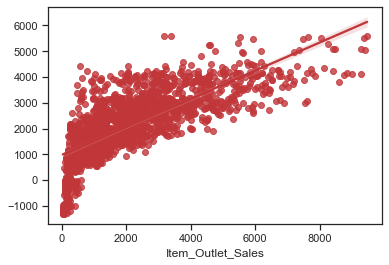

In [260]:
sns.regplot(y_test, y_pred)

### Regularisation

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j.

In [261]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)



In [262]:
pred

array([3239.18082396, 1154.88040966, 1703.3149902 , ..., 1147.92425291,
       2590.24349129, 3122.1967286 ])

In [263]:
from sklearn import metrics
from sklearn.metrics import r2_score

ri1 = metrics.mean_absolute_error(y_test,pred)
ri2 = np.mean(np.abs(y_test- pred)/y_test)*100
ri3 = metrics.mean_squared_error(y_test, pred)
ri4 = np.sqrt(metrics.mean_squared_error(y_test, pred))
ri5 = r2_score(y_test, pred)

In [264]:
values1=[ri1,ri2,ri3,ri4,ri5]
error = pd.DataFrame({'Errors' :errors, 'LR Metrics': values, 'Ridge Metrics': values1})

error

,Errors,LR Metrics,Ridge Metrics
0,MAE,8.498714e+02,8.495263e+02
1,MAPE,1.030180e+02,9.283729e+01
2,MSE,1.349918e+06,1.366362e+06
3,RMSE,1.161860e+03,1.168915e+03
4,R2 Score,5.619796e-01,5.566437e-01


In [265]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

pred1 = lassoReg.predict(X_test)

In [266]:
from sklearn import metrics
from sklearn.metrics import r2_score

la1 = metrics.mean_absolute_error(y_test,pred1)
la2 = np.mean(np.abs(y_test- pred1)/y_test)*100
la3 = metrics.mean_squared_error(y_test, pred1)
la4 = np.sqrt(metrics.mean_squared_error(y_test, pred1))
la5 = r2_score(y_test, pred1)

In [267]:
values2=[la1,la2,la3,la4,la5]
error = pd.DataFrame({'Errors' :errors, 'LR Metrics': values, 'Ridge Metrics': values1, 'Lasso Metrics': values2})

error

,Errors,LR Metrics,Ridge Metrics,Lasso Metrics
0,MAE,8.498714e+02,8.495263e+02,8.479744e+02
1,MAPE,1.030180e+02,9.283729e+01,9.506832e+01
2,MSE,1.349918e+06,1.366362e+06,1.357198e+06
3,RMSE,1.161860e+03,1.168915e+03,1.164988e+03
4,R2 Score,5.619796e-01,5.566437e-01,5.596173e-01


In [268]:
### FITTING A RANDOM FOREST REGRESSOR 
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rf= regressor.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)




In [269]:
r1 = metrics.mean_absolute_error(y_test,y_pred2)
r2 = np.mean(np.abs(y_test- y_pred2)/y_test)*100
r3= metrics.mean_squared_error(y_test, y_pred2)
r4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
r5 = r2_score(y_test, y_pred2)

 
  

In [270]:
metrics=['MAE','MAPE', 'MSE', 'RMSE','r2 score- Testing']
values3=[r1,r2,r3,r4,r5]

In [271]:
error = pd.DataFrame({'Errors' :errors, 'LR Metrics': values, 'Ridge Metrics': values1, 'Lasso Metrics': values2, 'RF Metrics': values3})

error

,Errors,LR Metrics,Ridge Metrics,Lasso Metrics,RF Metrics
0,MAE,8.498714e+02,8.495263e+02,8.479744e+02,8.800658e+02
1,MAPE,1.030180e+02,9.283729e+01,9.506832e+01,6.021411e+01
2,MSE,1.349918e+06,1.366362e+06,1.357198e+06,1.598264e+06
3,RMSE,1.161860e+03,1.168915e+03,1.164988e+03,1.264225e+03
4,R2 Score,5.619796e-01,5.566437e-01,5.596173e-01,4.813964e-01


## Observations: 
The RMSE and R squared value is comparatively better for Linear regression so we will consider these models in this case according to business requirement. Later on we can try to hyper tune the models and check for the optimum results